In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
listNames = ['Khulan','Adrian','Mathilde','Virgil','FannyM','Margaux','JL','Hélène','Luca','Brice','ThiMai','Ani','Romain','StephB']
_type=['Grasshopper', 'Hybrid', 'Plugin']
niv=['No experience','Novice','Limited','Basic','Advanced','Expert']


In [178]:
def convert_subject_level(n):
    _level = ["Aucune expérience", "Novice", "Limité", "Habitué", "Avancé", "Expert"]
    return _level.index(n)

def diff_analysis(_context):
    _diff = (_context.diff(1, 0) != 0)
    _diff.iloc[0] = False
    _diff['Time'] = _context['Time']
    return _diff

def sub_selection(_context, choice):
    facade_choice = choice
    if facade_choice == 0:
        return _context
    return _context.xs(choice, level='Object', drop_level=False)

def context_reorder(data, choice):
    context_grasshopper = data[(data["Object"] > 1.1) & (data["Object"] < 2)]
    context_hybrid = data[(data["Object"] > 2.1) & (data["Object"] < 3)]
    context_plugin = data[(data["Object"] > 3.1) & (data["Object"] < 4)]
    order1 = context_grasshopper.index[0]
    order2 = context_hybrid.index[0]
    order3 = context_plugin.index[0]
    _order = [_x for _, _x in sorted(zip([order1, order2, order3], [1, 2, 3]))]
    if choice == 0:
        return [context_grasshopper, context_hybrid, context_plugin], ['Grasshopper', 'Hybrid', 'Plugin'], _order
    elif choice == 1:
        return context_grasshopper, 'Grasshopper'
    elif choice == 2:
        return context_hybrid, 'Hybrid'
    elif choice == 3:
        return context_plugin, 'Plugin'


Index(['Autocad', 'Blender', 'SketchUp', 'Rhino', 'Grasshopper', 'Revit',
       'Archicad', '3dsMax', 'Average', 'Modeling', 'Bim'],
      dtype='object')

,Autocad,Blender,SketchUp,Rhino,Grasshopper,Revit,Archicad,3dsMax,Average,Modeling,Bim
Nom,,,,,,,,,,,
Khulan,3,0,3,1,1,2,0,0,2,3,2
Adrian,4,0,4,0,0,0,1,0,3,4,1
Mathilde,4,0,4,2,2,3,0,0,3,4,3
Virgil,3,0,3,3,3,4,0,0,3,3,4
FannyM,4,0,4,1,1,3,1,0,2,4,2
Margaux,3,0,3,2,2,1,2,0,2,3,2
JL,3,0,4,4,2,0,0,0,3,4,0
Hélène,4,0,4,1,1,3,0,0,3,4,3
Luca,3,2,4,3,3,2,1,0,3,3,2


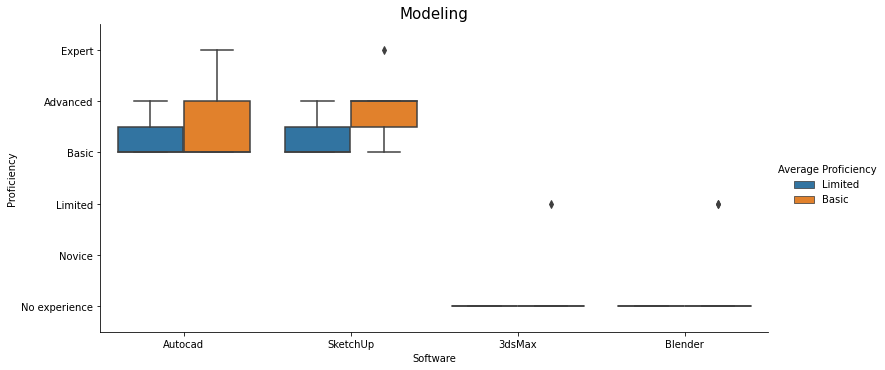

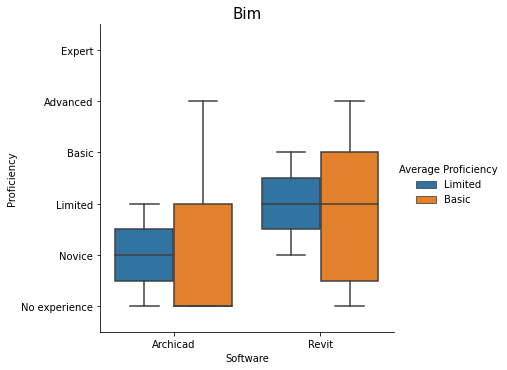

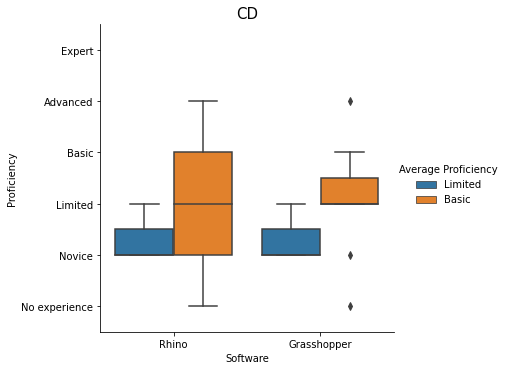

In [179]:
survey=pd.read_excel("Survey.xlsx")
survey['Nom']=listNames
intro= survey.iloc[:, [4, 7, 10, 16]]
subject_level_df= survey.iloc[:, [4, 21, 24, 27, 30, 33, 36, 39, 42]]
detail= survey.iloc[:, [4, 45, 48]]
interaction1_feedback= survey.iloc[:, [4, 51, 54, 57, 60, 63]]
interaction1_feedback.set_index('Nom', inplace=True)
interaction2_feedback= survey.iloc[:, [4, 69, 72, 75, 78, 81]]
interaction2_feedback.set_index('Nom', inplace=True)
interaction3_feedback= survey.iloc[:, [4, 87, 90, 93, 96, 99]]
interaction3_feedback.set_index('Nom', inplace=True)
posteriori_interaction1_feedback= survey.iloc[:, [4, 105, 108, 111, 114, 117]]
posteriori_interaction1_feedback.set_index('Nom', inplace=True)
posteriori_interaction2_feedback= survey.iloc[:, [4, 123, 126, 129, 132, 135]]
posteriori_interaction2_feedback.set_index('Nom', inplace=True)
posteriori_interaction3_feedback= survey.iloc[:, [4, 141, 144, 147, 150, 153]]
posteriori_interaction3_feedback.set_index('Nom', inplace=True)
col=interaction1_feedback.columns
interaction2_feedback.columns=col
interaction3_feedback.columns=col
posteriori_interaction1_feedback.columns=col
posteriori_interaction2_feedback.columns=col
posteriori_interaction3_feedback.columns=col
interaction_feedback=[interaction1_feedback, interaction2_feedback, interaction3_feedback]
posteriori_interaction_feedback=[posteriori_interaction1_feedback, posteriori_interaction2_feedback, posteriori_interaction3_feedback]

subject_level_df.set_index('Nom', inplace=True)
subject_level_df=subject_level_df.applymap(convert_subject_level)
#display(subject_level_df[subject_level_df!=0])
subject_level_df['Average']=subject_level_df[subject_level_df!=0].mean(axis=1).round(0).convert_dtypes(convert_integer=True)
subject_level_df['Modeling']=subject_level_df[subject_level_df!=0][['Autocad','SketchUp','Blender','3dsMax']].mean(axis=1).round(0).convert_dtypes(convert_integer=True)
subject_level_df['Bim']=subject_level_df[subject_level_df!=0][['Archicad','Revit']].mean(axis=1).fillna(0).round(0).convert_dtypes(convert_integer=True)
#subject_level_df['Tot'].quantile(q=0.5)
def profile(n):
    low=n.quantile(q=0.33)
    high=n.quantile(q=0.66)
    p=[]
    for x in n:
        if x <= low:
            p.append(0)
        elif low<x<=high:
            p.append(1)
        elif high<x:
            p.append(2)
    return p

profile=subject_level_df.apply(profile, axis=0)
Cat=["Modeling","Bim","CD","Average"]
Software=subject_level_df.columns.tolist()
display(subject_level_df.columns)
level=[0,0,0,2,2,1,1,0,3,3,3]
modeling_level_df=subject_level_df.reset_index('Nom').melt(id_vars=('Nom','Average'))
modeling_level_df['Type']=modeling_level_df['variable'].apply(lambda x:Cat[level[Software.index(x)]])
modeling_level_df.sort_values('Average',ascending=True, inplace=True)
modeling_level_df['Average']=modeling_level_df['Average'].apply(lambda x: niv[x])
modeling_level_df.columns=['Nom','Average Proficiency','variable','value','Type']
md= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="Modeling"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=2);
md.set_axis_labels("Software","Proficiency");
md.set(ylim=(-0.5,5.5),yticks=[0, 1, 2,3,4,5])
md.set_yticklabels(niv)
md.ax.set_title("Modeling",fontdict={'fontsize':15})
plt.savefig('output/modeling_proficiency.png',bbox_inches='tight')
bim= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="Bim"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=1);
bim.set_axis_labels("Software","Proficiency");
bim.ax.set_title("Bim",fontdict={'fontsize':15})
bim.ax.sharey(md.ax)
plt.savefig('output/Bim_proficiency.png',bbox_inches='tight')
CD= sns.catplot(x='variable',y='value', data=modeling_level_df[modeling_level_df['Type']=="CD"], hue="Average Proficiency", kind='box', ci=98, height=5, aspect=1);
CD.set_axis_labels("Software","Proficiency");
CD.ax.set_title("CD",fontdict={'fontsize':15})
CD.ax.sharey(md.ax)
plt.savefig('output/CD_proficiency.png',bbox_inches='tight')
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(subject_level_df)

In [180]:
iterations_df=pd.DataFrame()
time_iterations_df=pd.DataFrame()
time_phases_df=pd.DataFrame()
time_unique_df=pd.DataFrame()
phase_df=pd.DataFrame()
unique_df=pd.DataFrame()
feedback_df=pd.DataFrame()
for name in listNames:
    path = 'input/'+ name + '/' + name +'.csv'
    test = pd.read_csv(path,sep=';')
    test["Time"] = pd.to_datetime(test["Time"],format = '%H:%M:%S:%f')
    Implementations,Index,Order = context_reorder(test, 0)
    diff_df_list=[]
    phase=pd.DataFrame()
    int_feedback=[_x for _, _x in sorted(zip(Order, interaction_feedback))]
    int_feedback_post=[_x for _, _x in sorted(zip(Order, posteriori_interaction_feedback))]
    unique=pd.DataFrame()
    _time_iterations=pd.DataFrame()
    _time_phases=pd.DataFrame()
    _time_unique=pd.DataFrame()
    iteration=pd.DataFrame()
    _time=[]
    i=0
    time_intervals=11
    for implementation in Implementations:
        object_remap=pd.Series(implementation['Object'].map(lambda x:((x % 1)*10).__round__(0)).convert_dtypes(convert_integer=True))
        implementation.loc[:,'Object']=object_remap
        implementation = implementation.set_index(['Object'],append=True)
        implementation = implementation.rename_axis(['int','Object'])
        imp2=sub_selection(implementation,2)
        last2=imp2['Time'].iloc[-1]
        first2=imp2['Time'].iloc[0]
        imp3=sub_selection(implementation,3)
        last3=imp3['Time'].iloc[-1]
        first3=imp3['Time'].iloc[0]
        imp4=sub_selection(implementation,4)
        last4=imp4['Time'].iloc[-1]
        first4=imp4['Time'].iloc[0]
        delta_time2 = last2 - first2
        delta_time3 = last3 - first3
        delta_time4 = last4 - first4
        _time.append(delta_time2.seconds)
        _time.append(delta_time3.seconds)
        _time.append(delta_time4.seconds)
        diff_df_list.append(diff_analysis(sub_selection(implementation,2)).rename_axis([Index[i],'Object']))
        diff_df_list.append(diff_analysis(sub_selection(implementation,3)).rename_axis([Index[i],'Object']))
        diff_df_list.append(diff_analysis(sub_selection(implementation,4)).rename_axis([Index[i],'Object']))
        for k in range(2,5):
            time_unique=pd.DataFrame()
            imp=sub_selection(implementation,k)
            start_time=imp['Time'].iloc[0]
            imp.loc[:,'Time']= imp['Time'] - start_time
            imp.loc[:,'Time']=imp['Time'].map(lambda x:x.seconds)
            start_time=imp['Time'].iloc[0]
            end_time=imp['Time'].iloc[-1]
            timerange=end_time / time_intervals
            timerange_minutes=timerange/60
            timerange=timerange.__round__(2)
            for j in range(1, time_intervals+1):
                _imp2=imp[(imp['Time'] > start_time) & (imp['Time'] < (start_time + timerange * j))]
                _imp2=_imp2.nunique()
                imp1=imp[(imp['Time'] > start_time) & (imp['Time'] < (start_time + timerange * (j + 1)))].nunique()
                if _imp2.sum()>0:imp1=imp1-_imp2
                else:imp1=imp1*0
                time_unique=time_unique.append(imp1.drop(['Time']),ignore_index=True)

            time_unique[Index[i]]=time_unique.sum(axis=1)#.map(lambda _x:int(_x))
            if timerange>0.1:
                time_unique=time_unique[Index[i]]/timerange_minutes
            else:
                time_unique=time_unique[Index[i]]*0
            time_unique.rename(k,inplace=True)
            time_unique['Object']=k
            _time_unique=_time_unique.append(time_unique)

        _unique=pd.Series(imp2.nunique(axis=0),name=Index[i])
        _unique['Object']=2
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        _unique=pd.Series(imp3.nunique(axis=0),name=Index[i])
        _unique['Object']=3
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        _unique=pd.Series(imp4.nunique(axis=0),name=Index[i])
        _unique['Object']=4
        _unique['Order']=Order.index(i+1)+1
        unique=unique.append(_unique)
        i+=1
    i=0

    for diff_df in diff_df_list:
        _type_=diff_df.index.names[0]
        diff_df['Time']-=diff_df['Time'].iloc[0]
        start_time=diff_df['Time'].iloc[0]
        end_time=diff_df['Time'].iloc[-1]
        timerange= (end_time - start_time) / time_intervals
        diff_df.reset_index('Object',inplace=True)
        diff_df.set_index('Time',inplace=True)
        timeit=[]
        timerange_minutes=timerange.microseconds/60000000+timerange.seconds/60
        obj=diff_df['Object'][0]
        if timerange > (start_time-start_time):
            st=diff_df.resample(timerange, closed='left').sum()
            st[_type_]=st.drop('Object',axis=1).sum(axis=1)
            st=st.reset_index()
            st=st[_type_]
            st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
            st=st.iloc[:-1]/timerange_minutes
            st['Object']=obj
        else:
            st=pd.DataFrame(data=None,index=range(11))
            st[_type_]=1
            st=st[_type_]
            st['Object']=obj
        _time_iterations=_time_iterations.append(st)

        l=((diff_df * 1).diff(1, 0) == 1)
        if timerange > (start_time-start_time):
            st=l.resample(timerange,closed='left').sum()
            st[_type_]=st.drop('Object',axis=1).sum(axis=1)
            st=st.reset_index()
            st=st[_type_]
            st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
            st=st.iloc[:-1]/timerange_minutes
            st['Object']=obj
        else:
            st=pd.DataFrame(data=None,index=range(11))
            st[_type_]=1
            st=st[_type_]
            st['Object']=obj
        _time_phases=_time_phases.append(st)
        l=l.sum()
        l['Time']=_time[i]
        l['Object']=obj
        l['Order']=Order.index(_type.index(_type_)+1)+1
        l.name=_type_
        phase=phase.append(l)
        obj=diff_df['Object'][0]
        t=diff_df.sum()
        t['Time']=_time[i]
        t['Object']=obj
        t.name=_type_
        t['Order']=Order.index(_type.index(_type_)+1)+1
        i=i+1
        iteration=iteration.append(t)

    prf=""
    for level in subject_level_df.loc[name].values:
        prf=prf+str(int(level)).strip()
    Index1=_time_iterations.index
    iterations = pd.DataFrame(iteration,index=Index1)
    iterations=iterations.set_index(['Object','Order'],append=True)
    total_iterations = pd.Series(iterations.sum(),name='Tot')
    average_iterations = pd.Series(iterations.mean(),name='Average')
    std_iterations = pd.Series(iterations.std(),name='Standard Deviation')
    iteration=iteration.append(total_iterations)
    iteration=iteration.append(average_iterations)
    iteration=iteration.append(std_iterations)
    iteration['Name']=name
    iteration['Level']=prf
    iteration['Object']=iteration['Object'].convert_dtypes(convert_integer=True)
    iteration['Order']=iteration['Order'].convert_dtypes(convert_integer=True)
    iteration.rename_axis('Type',inplace=True)
    iteration = iteration.fillna(0)
    iteration.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    iteration = iteration.reorder_levels(['Name','Level','Order','Type','Object'])
    phases = pd.DataFrame(phase,index=Index1)
    phases=phases.set_index(['Object','Order'],append=True)
    total_phases = pd.Series(phases.sum(),name='Tot')
    avg_phases = pd.Series(phases.mean(),name='Average')
    std_phases = pd.Series(phases.std(),name='Standard Deviation')
    phase=phase.append(total_phases)
    phase=phase.append(avg_phases)
    phase=phase.append(std_phases)
    phase['Name']=name
    phase['Level']=prf
    phase['Object']=phase['Object'].convert_dtypes(convert_integer=True)
    phase['Order']=phase['Order'].convert_dtypes(convert_integer=True)
    phase.rename_axis('Type',inplace=True)
    phase = phase.fillna(0)
    phase.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    phase = phase.reorder_levels(['Name','Level','Order','Type','Object'])
    unique_vals = pd.DataFrame(unique, index=Index1)
    unique_vals=unique_vals.set_index(['Object','Order'],append=True)
    tot_unique_vals = pd.Series(unique_vals.sum(),name='Tot')
    avg_unique_vals = pd.Series(unique_vals.mean(),name='Average')
    std_unique_vals = pd.Series(unique_vals.std(),name='Standard Deviation')
    unique = unique.append(tot_unique_vals)
    unique = unique.append(avg_unique_vals)
    unique = unique.append(std_unique_vals)
    unique['Name']=name
    unique['Level']=prf
    unique['Object']=unique['Object'].convert_dtypes(convert_integer=True)
    unique['Order']=unique['Order'].convert_dtypes(convert_integer=True)
    unique.rename_axis('Type',inplace=True)
    unique = unique.fillna(0)
    unique.set_index(['Name','Object','Order','Level'],append=True,inplace=True)
    unique = unique.reorder_levels(['Name','Level','Order','Type','Object'])
    Name = [name]
    Index=iteration.drop(['Tot','Average','Standard Deviation'],axis=0,level='Type').index
    Index2=Index.droplevel('Object').drop_duplicates()
    feedback_post=pd.DataFrame([int_feedback_post[0].xs(name), int_feedback_post[1].xs(name), int_feedback_post[2].xs(name)], index=Index2)
    feedback=pd.DataFrame([int_feedback[0].xs(name), int_feedback[1].xs(name), int_feedback[2].xs(name)], index=Index2)
    _time_iterations=pd.DataFrame(_time_iterations.drop(['Object'],axis=1).values, index=Index)
    _time_phases=pd.DataFrame(_time_phases.drop(['Object'],axis=1).values, index=Index)
    _time_unique=pd.DataFrame(_time_unique.drop(['Object'],axis=1).values, index=Index)

    feedback['Survey']= 'A'
    feedback_post['Survey']= 'B'
    feedback=feedback.append(feedback_post)
    feedback.set_index('Survey', append=True, inplace=True)
    unique['Max']=unique.drop('Time',axis=1).max(axis=1)
    unique['Total']=unique.drop(['Max','Time'],axis=1).sum(axis=1)
    unique['CV']=unique.drop(['Total','Max','Time'],axis=1).std(axis=1)/unique.drop(['Time','Total','Max'],axis=1).mean(axis=1)
    phase['Max']=phase.drop('Time',axis=1).max(axis=1)
    phase['Total']=phase.drop(['Max','Time'],axis=1).sum(axis=1)
    phase['CV']=phase.drop(['Total','Max','Time'],axis=1).std(axis=1)/phase.drop(['Time','Total','Max'],axis=1).mean(axis=1)

    iteration['Max']=iteration.drop('Time',axis=1).max(axis=1)
    iteration['Total']=iteration.drop(['Max','Time'],axis=1).sum(axis=1)
    iteration['CV']=iteration.drop(['Total','Max','Time'],axis=1).std(axis=1)/iteration.drop(['Time','Total','Max'],axis=1).mean(axis=1)

    if iterations_df.shape[0]>1:
        iterations_df = iterations_df.append(iteration)
        phase_df = phase_df.append(phase)
        unique_df = unique_df.append(unique)
        feedback_df = feedback_df.append(feedback)
        time_iterations_df=time_iterations_df.append(_time_iterations)
        time_phases_df=time_phases_df.append(_time_phases)
        time_unique_df=time_unique_df.append(_time_unique)
    elif iterations_df.shape[0]<1 :
        iterations_df=iteration
        phase_df=phase
        unique_df = unique
        feedback_df = feedback
        time_iterations_df = _time_iterations
        time_phases_df = _time_phases
        time_unique_df= _time_unique
feedback_df.columns=['Accessibility', 'Comprehension', 'Ease of Use', 'Usability', 'Satisfaction']
feedback_df=feedback_df.reset_index(['Name','Type', 'Level', 'Order', 'Survey'], drop=False)
feedback_df=feedback_df.melt(id_vars=['Name','Type', 'Level', 'Order', 'Survey'])
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
#display(iterations_df.round(decimals=2))
    display(type(feedback_df))
v=iterations_df.xs('Adrian',level='Name',drop_level=False).xs('Hybrid',level='Type',drop_level=False).index
iterations_df=iterations_df.drop(v)
iterations_df.to_csv('input/iterations.csv',encoding='UTF-16BE',sep=";")
phase_df=phase_df.drop(v)
phase_df.to_csv('input/phase.csv',encoding='UTF-16BE',sep=";")
unique_df=unique_df.drop(v)
unique_df.to_csv('input/unique.csv',encoding='UTF-16BE',sep=";")
time_iterations_df.to_csv('input/time_iterations.csv',encoding='UTF-16BE',sep=";")
time_unique_df.to_csv('input/time_unique.csv',encoding='UTF-16BE',sep=";")
time_phases_df.to_csv('input/time_phases.csv',encoding='UTF-16BE',sep=";")
feedback_df.to_csv('input/feedback.csv',encoding='UTF-16BE',sep=";",index=False)

C:\Users\Xavier\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


pandas.core.frame.DataFrame